In [2]:
#read in file

import pandas as pd

housing_data = pd.read_csv('housingCalifornia.csv')

Correlation Matrix of Numerical Features:
longitude - latitude: -0.92
longitude - housingMedianAge: -0.11
longitude - totalRooms: 0.04
longitude - totalBedrooms: 0.07
longitude - population: 0.10
longitude - households: 0.06
longitude - medianIncome: -0.02
longitude - medianHouseValue: -0.05
latitude - housingMedianAge: 0.01
latitude - totalRooms: -0.04
latitude - totalBedrooms: -0.07
latitude - population: -0.11
latitude - households: -0.07
latitude - medianIncome: -0.08
latitude - medianHouseValue: -0.14
housingMedianAge - totalRooms: -0.36
housingMedianAge - totalBedrooms: -0.32
housingMedianAge - population: -0.30
housingMedianAge - households: -0.30
housingMedianAge - medianIncome: -0.12
housingMedianAge - medianHouseValue: 0.11
totalRooms - totalBedrooms: 0.93
totalRooms - population: 0.86
totalRooms - households: 0.92
totalRooms - medianIncome: 0.20
totalRooms - medianHouseValue: 0.13
totalBedrooms - population: 0.88
totalBedrooms - households: 0.98
totalBedrooms - medianIncome:

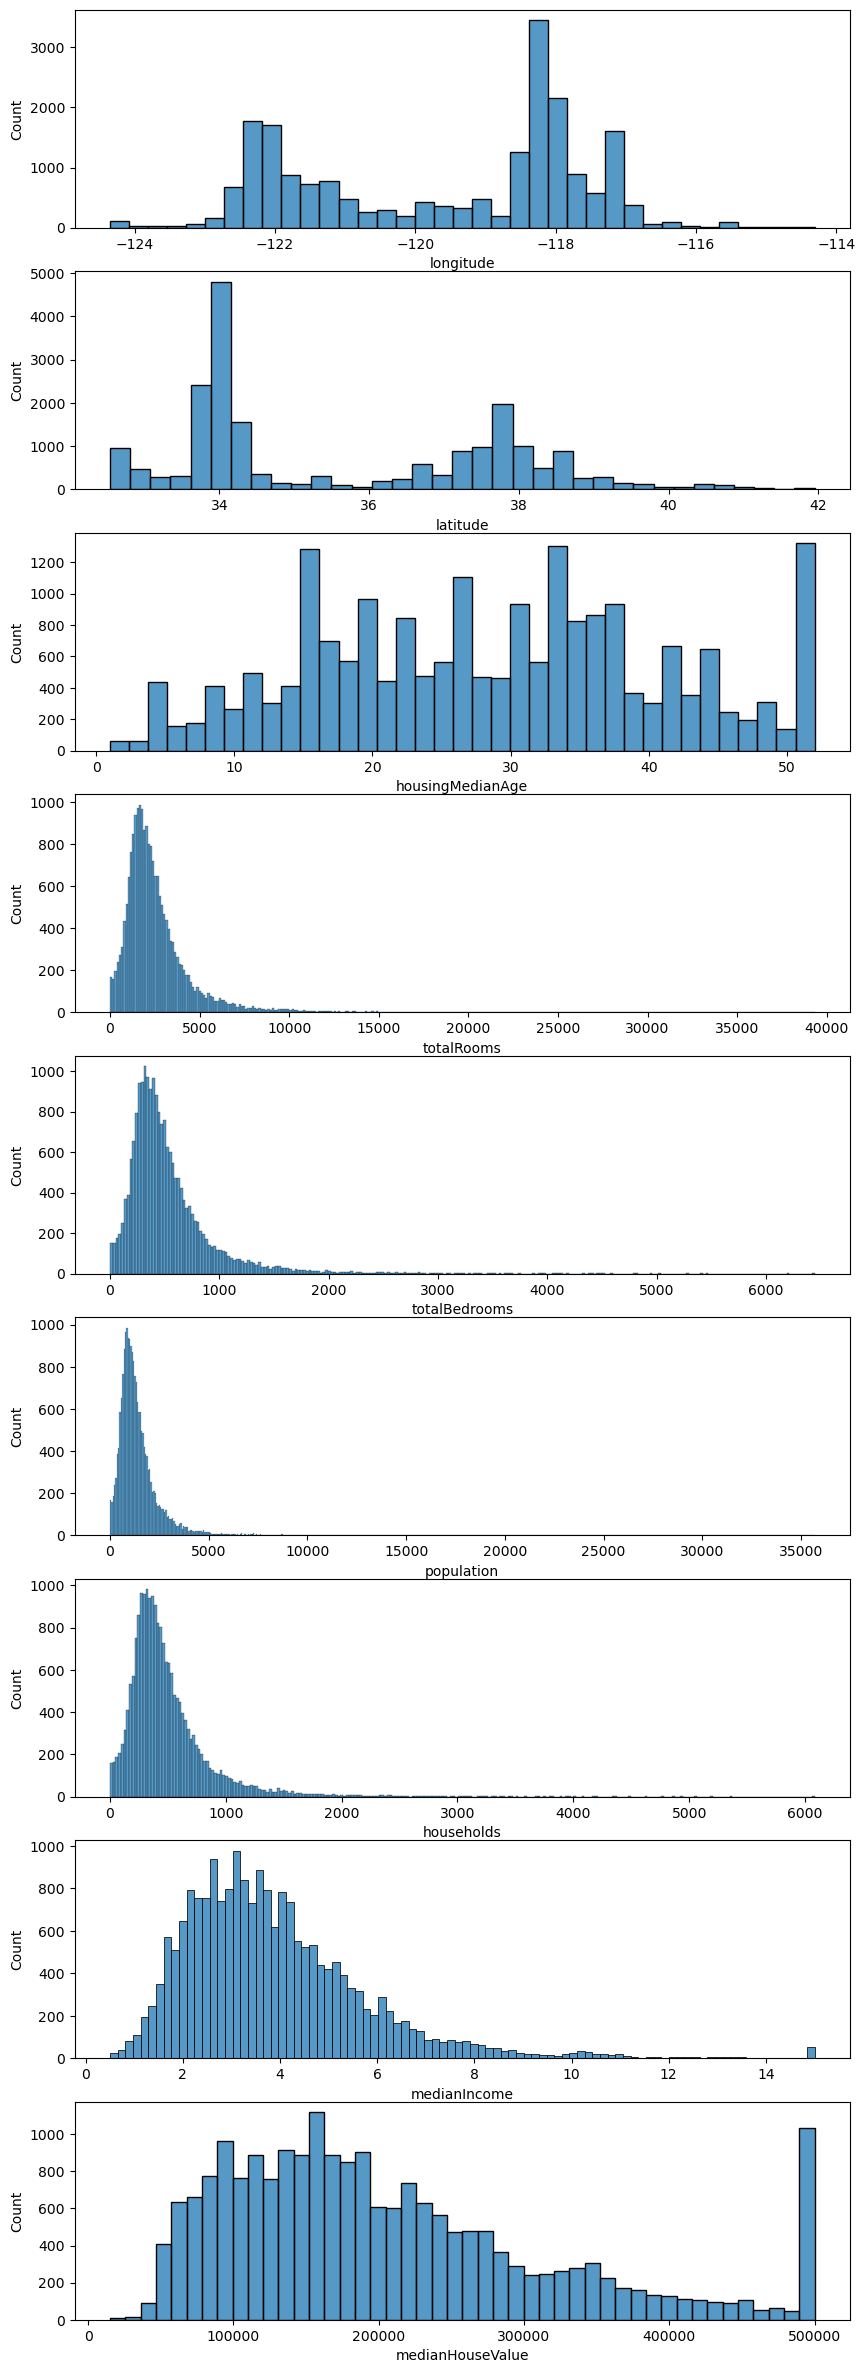

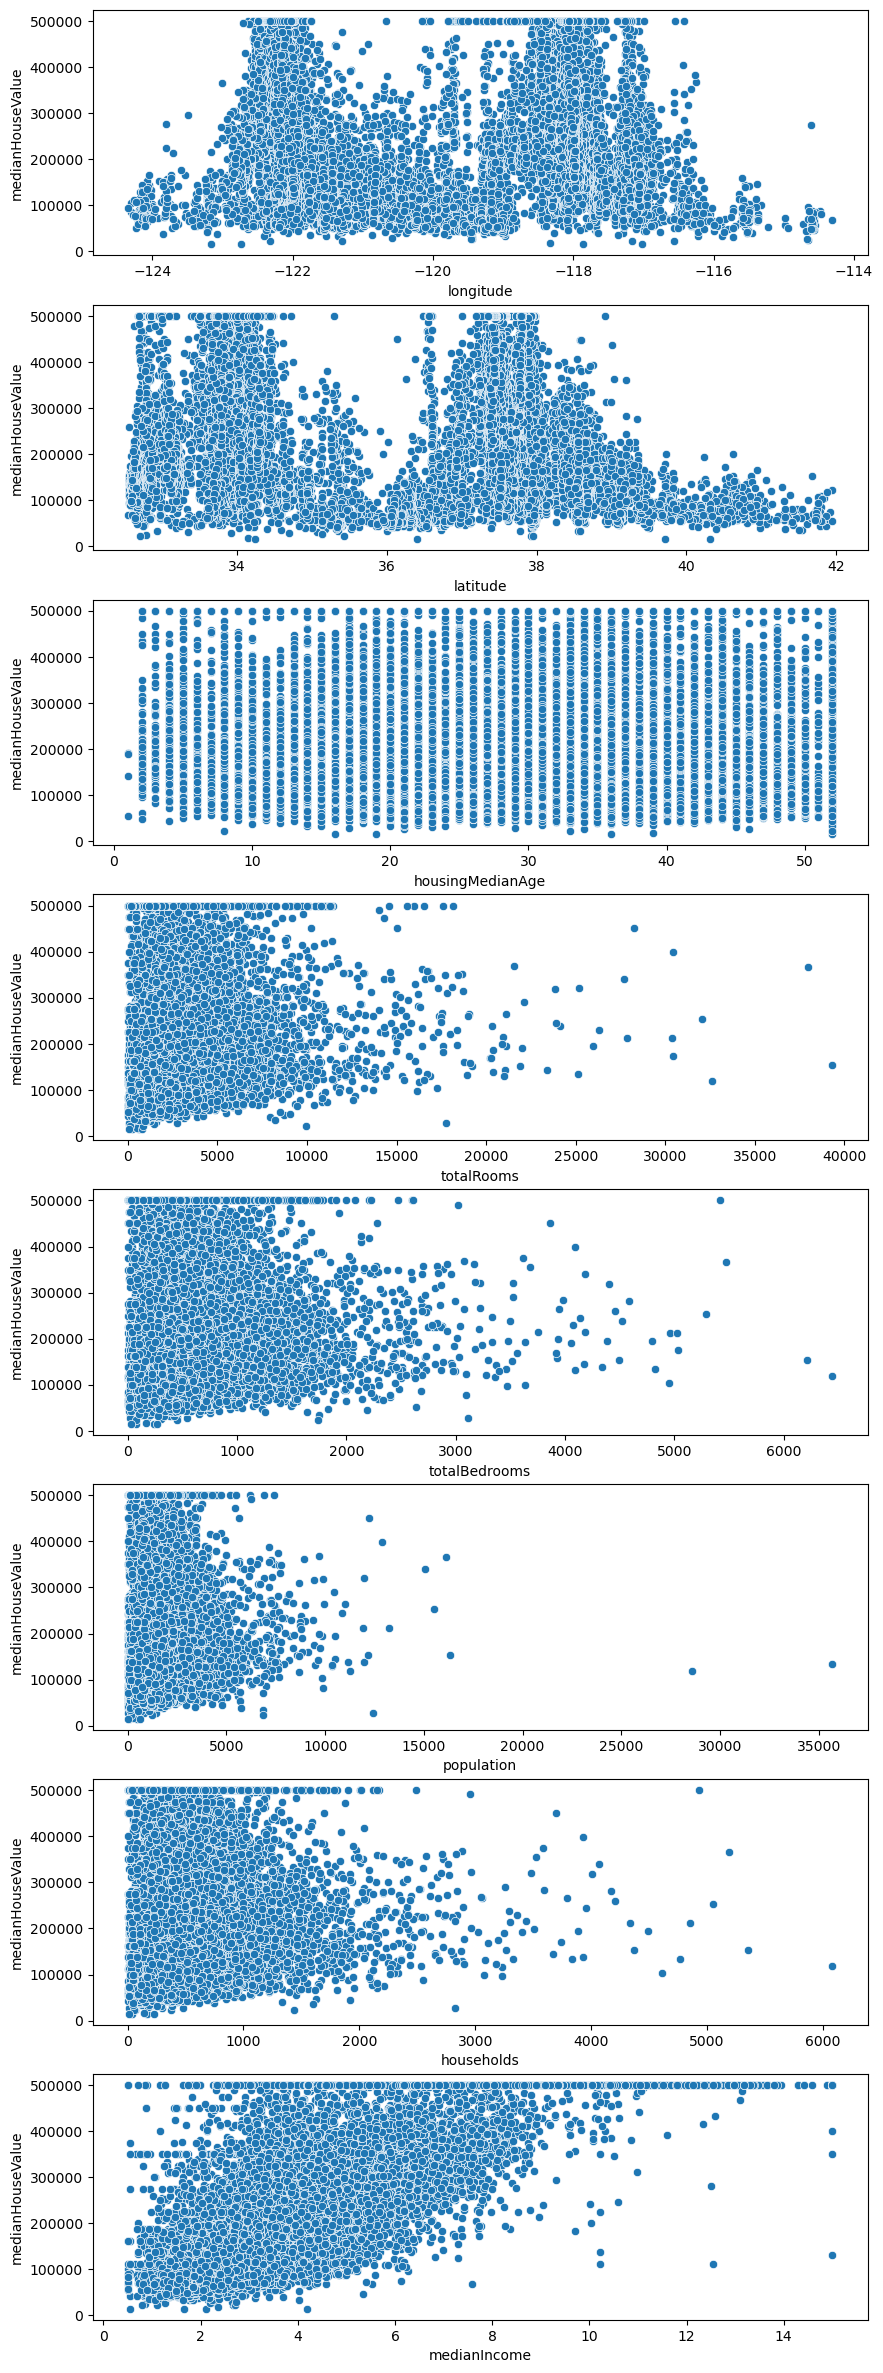

In [3]:
#D1

import seaborn as sns
import matplotlib.pyplot as plt

numerical_data = housing_data.select_dtypes(include=['float64', 'int64'])

fig, axs = plt.subplots(nrows=numerical_data.shape[1], figsize=(10, 30))
for i, col in enumerate(numerical_data.columns):
    sns.histplot(data=numerical_data, x=col, ax=axs[i])

correlation_matrix = numerical_data.corr()

print("Correlation Matrix of Numerical Features:")
for i in range(len(correlation_matrix.columns)):
    for j in range(i+1, len(correlation_matrix.columns)):
        print(f"{correlation_matrix.columns[i]} - {correlation_matrix.columns[j]}: {correlation_matrix.iloc[i, j]:.2f}")

highly_correlated = correlation_matrix[correlation_matrix > 0.8]

print("\nHighly Correlated Features:")
for i in range(len(highly_correlated.columns)):
    for j in range(i+1, len(highly_correlated.columns)):
        if highly_correlated.iloc[i, j] > 0.8:
            print(f"{highly_correlated.columns[i]} - {highly_correlated.columns[j]}: {highly_correlated.iloc[i, j]:.2f}")


target = 'medianHouseValue'

numerical_data = housing_data.drop(target, axis=1).select_dtypes(include=['float64', 'int64'])

fig, axs = plt.subplots(nrows=numerical_data.shape[1], figsize=(10, 30))
for i, col in enumerate(numerical_data.columns):
    sns.scatterplot(data=housing_data, x=col, y=target, ax=axs[i])

In [4]:

dummies = pd.get_dummies(housing_data['oceanProximity'], drop_first=True)

data1 = pd.concat([housing_data, dummies], axis=1)

data1 = data1.drop('oceanProximity', axis=1)

data2 = data1.copy()

data2['medianHouseValue'] = data2['medianHouseValue'] / 100000

In [5]:
#D2 data processing


from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

train1, test1 = train_test_split(data1, test_size=0.2, random_state=5508)

train2, test2 = train_test_split(data2, test_size=0.2, random_state=5508)


scaler1 = StandardScaler()
scaler2 = StandardScaler()

train1_scaled = scaler1.fit_transform(train1)
test1_scaled = scaler1.transform(test1)

train2_scaled = scaler2.fit_transform(train2)
test2_scaled = scaler2.transform(test2)

train1_scaled = pd.DataFrame(train1_scaled, columns=train1.columns)
test1_scaled = pd.DataFrame(test1_scaled, columns=test1.columns)

train2_scaled = pd.DataFrame(train2_scaled, columns=train2.columns)
test2_scaled = pd.DataFrame(test2_scaled, columns=test2.columns)



In [6]:
from sklearn.metrics import root_mean_squared_error
from sklearn.linear_model import LinearRegression, Lasso

train1_target_orig = train1['medianHouseValue']
test1_target_orig = test1['medianHouseValue']
train1_regres_orig = train1.drop('medianHouseValue', axis=1)
test1_regres_orig = test1.drop('medianHouseValue', axis=1)

train2_target_orig = train2['medianHouseValue']
test2_target_orig = test2['medianHouseValue']
train2_regres_orig = train2.drop('medianHouseValue', axis=1)
test2_regres_orig = test2.drop('medianHouseValue', axis=1)

train1_target_scaled = train1_scaled['medianHouseValue']
test1_target_scaled = test1_scaled['medianHouseValue']
train1_regres_scaled = train1_scaled.drop('medianHouseValue', axis=1)
test1_regres_scaled = test1_scaled.drop('medianHouseValue', axis=1)

train2_target_scaled = train2_scaled['medianHouseValue']
test2_target_scaled = test2_scaled['medianHouseValue']
train2_regres_scaled = train2_scaled.drop('medianHouseValue', axis=1)
test2_regres_scaled = test2_scaled.drop('medianHouseValue', axis=1)



linear_reg1 = LinearRegression()
linear_reg1.fit(train1_regres_orig, train1_target_orig)
linear_reg1_train_pred = linear_reg1.predict(train1_regres_orig)
linear_reg1_test_pred = linear_reg1.predict(test1_regres_orig)
linear_reg1_train_rmse = root_mean_squared_error(train1_target_orig, linear_reg1_train_pred)
linear_reg1_test_rmse = root_mean_squared_error(test1_target_orig, linear_reg1_test_pred)

linear_reg1_scaled = LinearRegression() 
linear_reg1_scaled.fit(train1_regres_scaled, train1_target_scaled)
linear_reg1_train_pred_scaled = linear_reg1_scaled.predict(train1_regres_scaled)
linear_reg1_test_pred_scaled = linear_reg1_scaled.predict(test1_regres_scaled)
linear_reg1_train_rmse_scaled = root_mean_squared_error(train1_target_scaled, linear_reg1_train_pred_scaled)
linear_reg1_test_rmse_scaled = root_mean_squared_error(test1_target_scaled, linear_reg1_test_pred_scaled)

linear_reg2 = LinearRegression()
linear_reg2.fit(train2_regres_orig, train2_target_orig)
linear_reg2_train_pred = linear_reg2.predict(train2_regres_orig)
linear_reg2_test_pred = linear_reg2.predict(test2_regres_orig)
linear_reg2_train_rmse = root_mean_squared_error(train2_target_orig, linear_reg2_train_pred)
linear_reg2_test_rmse = root_mean_squared_error(test2_target_orig, linear_reg2_test_pred)

linear_reg2_scaled = LinearRegression()
linear_reg2_scaled.fit(train2_regres_scaled, train2_target_scaled)
linear_reg2_train_pred_scaled = linear_reg2_scaled.predict(train2_regres_scaled)
linear_reg2_test_pred_scaled = linear_reg2_scaled.predict(test2_regres_scaled)
linear_reg2_train_rmse_scaled = root_mean_squared_error(train2_target_scaled, linear_reg2_train_pred_scaled)
linear_reg2_test_rmse_scaled = root_mean_squared_error(test2_target_scaled, linear_reg2_test_pred_scaled)

lasso_reg1 = Lasso(alpha=100)
lasso_reg1.fit(train1_regres_orig, train1_target_orig)
lasso_reg1_train_pred = lasso_reg1.predict(train1_regres_orig)
lasso_reg1_test_pred = lasso_reg1.predict(test1_regres_orig)
lasso_reg1_train_rmse = root_mean_squared_error(train1_target_orig, lasso_reg1_train_pred)
lasso_reg1_test_rmse = root_mean_squared_error(test1_target_orig, lasso_reg1_test_pred)

lasso_reg1_scaled = Lasso(alpha=100)
lasso_reg1_scaled.fit(train1_regres_scaled, train1_target_scaled)
lasso_reg1_train_pred_scaled = lasso_reg1_scaled.predict(train1_regres_scaled)
lasso_reg1_test_pred_scaled = lasso_reg1_scaled.predict(test1_regres_scaled)
lasso_reg1_train_rmse_scaled = root_mean_squared_error(train1_target_scaled, lasso_reg1_train_pred_scaled)
lasso_reg1_test_rmse_scaled = root_mean_squared_error(test1_target_scaled, lasso_reg1_test_pred_scaled)

lasso_reg2 = Lasso(alpha=100)
lasso_reg2.fit(train2_regres_orig, train2_target_orig)
lasso_reg2_train_pred = lasso_reg2.predict(train2_regres_orig)
lasso_reg2_test_pred = lasso_reg2.predict(test2_regres_orig)
lasso_reg2_train_rmse = root_mean_squared_error(train2_target_orig, lasso_reg2_train_pred)
lasso_reg2_test_rmse = root_mean_squared_error(test2_target_orig, lasso_reg2_test_pred)


lasso_reg2_scaled = Lasso(alpha=100)
lasso_reg2_scaled.fit(train2_regres_scaled, train2_target_scaled)
lasso_reg2_train_pred_scaled = lasso_reg2_scaled.predict(train2_regres_scaled)
lasso_reg2_test_pred_scaled = lasso_reg2_scaled.predict(test2_regres_scaled)
lasso_reg2_train_rmse_scaled = root_mean_squared_error(train2_target_scaled, lasso_reg2_train_pred_scaled)
lasso_reg2_test_rmse_scaled = root_mean_squared_error(test2_target_scaled, lasso_reg2_test_pred_scaled)


print("Linear Regression on Original Data 1:")
print(f"Training RMSE: {linear_reg1_train_rmse:.2f}")
print(f"Testing RMSE: {linear_reg1_test_rmse:.2f}")

print("\nLinear Regression on Standardized Data 1:")
print(f"Training RMSE: {linear_reg1_train_rmse_scaled:.2f}")
print(f"Testing RMSE: {linear_reg1_test_rmse_scaled:.2f}")

print("\nLasso Regression on Original Data 1:")
print(f"Training RMSE: {lasso_reg1_train_rmse:.2f}")
print(f"Testing RMSE: {lasso_reg1_test_rmse:.2f}")

print("\nLasso Regression on Standardized Data 1:")
print(f"Training RMSE: {lasso_reg1_train_rmse_scaled:.2f}")
print(f"Testing RMSE: {lasso_reg1_test_rmse_scaled:.2f}")

print("\nLinear Regression on Original Data 2:")
print(f"Training RMSE: {linear_reg2_train_rmse:.2f}")
print(f"Testing RMSE: {linear_reg2_test_rmse:.2f}")

print("\nLinear Regression on Standardized Data 2:")
print(f"Training RMSE: {linear_reg2_train_rmse_scaled:.2f}")
print(f"Testing RMSE: {linear_reg2_test_rmse_scaled:.2f}")

print("\nLasso Regression on Original Data 2:")
print(f"Training RMSE: {lasso_reg2_train_rmse:.2f}")
print(f"Testing RMSE: {lasso_reg2_test_rmse:.2f}")

print("\nLasso Regression on Standardized Data 2:")
print(f"Training RMSE: {lasso_reg2_train_rmse_scaled:.2f}")
print(f"Testing RMSE: {lasso_reg2_test_rmse_scaled:.2f}")



Linear Regression on Original Data 1:
Training RMSE: 68607.31
Testing RMSE: 68589.31

Linear Regression on Standardized Data 1:
Training RMSE: 0.59
Testing RMSE: 0.59

Lasso Regression on Original Data 1:
Training RMSE: 68660.50
Testing RMSE: 68601.81

Lasso Regression on Standardized Data 1:
Training RMSE: 1.00
Testing RMSE: 0.99

Linear Regression on Original Data 2:
Training RMSE: 0.69
Testing RMSE: 0.69

Linear Regression on Standardized Data 2:
Training RMSE: 0.59
Testing RMSE: 0.59

Lasso Regression on Original Data 2:
Training RMSE: 1.13
Testing RMSE: 1.12

Lasso Regression on Standardized Data 2:
Training RMSE: 1.00
Testing RMSE: 0.99


In [7]:
#D3 data augmentation and processing
data3 = data2.copy()

data3['meanRooms'] = data3['totalRooms'] / data3['households']
data3['meanBedrooms'] = data3['totalBedrooms'] / data3['households']
data3['meanOccupation'] = data3['population'] / data3['households']

data3 = data3.drop(['totalRooms', 'totalBedrooms', 'population'], axis=1)

train3, test3 = train_test_split(data3, test_size=0.2, random_state=5508)

scaler3 = StandardScaler()

train3_scaled = scaler3.fit_transform(train3)
test3_scaled = scaler3.transform(test3)

train3_scaled = pd.DataFrame(train3_scaled, columns=train3.columns)
test3_scaled = pd.DataFrame(test3_scaled, columns=test3.columns)




In [8]:
#D3 model fitting

train3_target = train3['medianHouseValue']
test3_target = test3['medianHouseValue']

train3_regres = train3.drop('medianHouseValue', axis=1)
test3_regres = test3.drop('medianHouseValue', axis=1)

train3_target_scaled = train3_scaled['medianHouseValue']
test3_target_scaled = test3_scaled['medianHouseValue']

train3_regres_scaled = train3_scaled.drop('medianHouseValue', axis=1)
test3_regres_scaled = test3_scaled.drop('medianHouseValue', axis=1)

# linear reg 

linear_reg3 = LinearRegression()
linear_reg3.fit(train3_regres, train3_target)
linear_reg3_train_pred = linear_reg3.predict(train3_regres)
linear_reg3_test_pred = linear_reg3.predict(test3_regres)
linear_reg3_train_rmse = root_mean_squared_error(train3_target, linear_reg3_train_pred)
linear_reg3_test_rmse = root_mean_squared_error(test3_target, linear_reg3_test_pred)

linear_reg3_scaled = LinearRegression()
linear_reg3_scaled.fit(train3_regres_scaled, train3_target_scaled)
linear_reg3_train_pred_scaled = linear_reg3_scaled.predict(train3_regres_scaled)
linear_reg3_test_pred_scaled = linear_reg3_scaled.predict(test3_regres_scaled)
linear_reg3_train_rmse_scaled = root_mean_squared_error(train3_target_scaled, linear_reg3_train_pred_scaled)
linear_reg3_test_rmse_scaled = root_mean_squared_error(test3_target_scaled, linear_reg3_test_pred_scaled)

# lasso reg

lasso_reg3 = Lasso(alpha=100)
lasso_reg3.fit(train3_regres, train3_target)
lasso_reg3_train_pred = lasso_reg3.predict(train3_regres)
lasso_reg3_test_pred = lasso_reg3.predict(test3_regres)
lasso_reg3_train_rmse = root_mean_squared_error(train3_target, lasso_reg3_train_pred)
lasso_reg3_test_rmse = root_mean_squared_error(test3_target, lasso_reg3_test_pred)

lasso_reg3_scaled = Lasso(alpha=100)
lasso_reg3_scaled.fit(train3_regres_scaled, train3_target_scaled)
lasso_reg3_train_pred_scaled = lasso_reg3_scaled.predict(train3_regres_scaled)
lasso_reg3_test_pred_scaled = lasso_reg3_scaled.predict(test3_regres_scaled)
lasso_reg3_train_rmse_scaled = root_mean_squared_error(train3_target_scaled, lasso_reg3_train_pred_scaled)
lasso_reg3_test_rmse_scaled = root_mean_squared_error(test3_target_scaled, lasso_reg3_test_pred_scaled)



print("\nLinear Regression on Original Data 3:")
print(f"Training RMSE: {linear_reg3_train_rmse:.2f}")
print(f"Testing RMSE: {linear_reg3_test_rmse:.2f}")

print("\nLinear Regression on Standardized Data 3:")
print(f"Training RMSE: {linear_reg3_train_rmse_scaled:.2f}")
print(f"Testing RMSE: {linear_reg3_test_rmse_scaled:.2f}")

print("\nLasso Regression on Original Data 3:")
print(f"Training RMSE: {lasso_reg3_train_rmse:.2f}")
print(f"Testing RMSE: {lasso_reg3_test_rmse:.2f}")

print("\nLasso Regression on Standardized Data 3:")
print(f"Training RMSE: {lasso_reg3_train_rmse_scaled:.2f}")
print(f"Testing RMSE: {lasso_reg3_test_rmse_scaled:.2f}")


Linear Regression on Original Data 3:
Training RMSE: 0.71
Testing RMSE: 1.09

Linear Regression on Standardized Data 3:
Training RMSE: 0.61
Testing RMSE: 0.95

Lasso Regression on Original Data 3:
Training RMSE: 1.16
Testing RMSE: 1.14

Lasso Regression on Standardized Data 3:
Training RMSE: 1.00
Testing RMSE: 0.99


In [9]:
#D3 c

linear_reg1_coef = pd.DataFrame(linear_reg1.coef_, index=train1_regres_orig.columns, columns=['Coefficient'])
linear_reg1_coef.loc['Intercept'] = linear_reg1.intercept_

linear_reg1_scaled_coef = pd.DataFrame(linear_reg1_scaled.coef_, index=train1_regres_scaled.columns, columns=['Coefficient'])
linear_reg1_scaled_coef.loc['Intercept'] = linear_reg1_scaled.intercept_

lasso_reg1_coef = pd.DataFrame(lasso_reg1.coef_, index=train1_regres_orig.columns, columns=['Coefficient'])
lasso_reg1_coef.loc['Intercept'] = lasso_reg1.intercept_

lasso_reg1_scaled_coef = pd.DataFrame(lasso_reg1_scaled.coef_, index=train1_regres_scaled.columns, columns=['Coefficient'])
lasso_reg1_scaled_coef.loc['Intercept'] = lasso_reg1_scaled.intercept_

linear_reg2_coef = pd.DataFrame(linear_reg2.coef_, index=train2_regres_orig.columns, columns=['Coefficient'])
linear_reg2_coef.loc['Intercept'] = linear_reg2.intercept_

linear_reg2_scaled_coef = pd.DataFrame(linear_reg2_scaled.coef_, index=train2_regres_scaled.columns, columns=['Coefficient'])
linear_reg2_scaled_coef.loc['Intercept'] = linear_reg2_scaled.intercept_

lasso_reg2_coef = pd.DataFrame(lasso_reg2.coef_, index=train2_regres_orig.columns, columns=['Coefficient'])
lasso_reg2_coef.loc['Intercept'] = lasso_reg2.intercept_

lasso_reg2_scaled_coef = pd.DataFrame(lasso_reg2_scaled.coef_, index=train2_regres_scaled.columns, columns=['Coefficient'])
lasso_reg2_scaled_coef.loc['Intercept'] = lasso_reg2_scaled.intercept_

linear_reg3_coef = pd.DataFrame(linear_reg3.coef_, index=train3_regres.columns, columns=['Coefficient'])
linear_reg3_coef.loc['Intercept'] = linear_reg3.intercept_

linear_reg3_scaled_coef = pd.DataFrame(linear_reg3_scaled.coef_, index=train3_regres_scaled.columns, columns=['Coefficient'])
linear_reg3_scaled_coef.loc['Intercept'] = linear_reg3_scaled.intercept_

lasso_reg3_coef = pd.DataFrame(lasso_reg3.coef_, index=train3_regres.columns, columns=['Coefficient'])
lasso_reg3_coef.loc['Intercept'] = lasso_reg3.intercept_

lasso_reg3_scaled_coef = pd.DataFrame(lasso_reg3_scaled.coef_, index=train3_regres_scaled.columns, columns=['Coefficient'])
lasso_reg3_scaled_coef.loc['Intercept'] = lasso_reg3_scaled.intercept_

print("Linear Regression 1 Coefficients:\n", linear_reg1_coef.to_string())
print("\nLinear Regression 1 Scaled Coefficients:\n", linear_reg1_scaled_coef.to_string())
print("\nLasso Regression 1 Coefficients:\n", lasso_reg1_coef.to_string())
print("\nLasso Regression 1 Scaled Coefficients:\n", lasso_reg1_scaled_coef.to_string())

print("\nLinear Regression 2 Coefficients:\n", linear_reg2_coef.to_string())
print("\nLinear Regression 2 Scaled Coefficients:\n", linear_reg2_scaled_coef.to_string())
print("\nLasso Regression 2 Coefficients:\n", lasso_reg2_coef.to_string())
print("\nLasso Regression 2 Scaled Coefficients:\n", lasso_reg2_scaled_coef.to_string())

print("\nLinear Regression 3 Coefficients:\n", linear_reg3_coef.to_string())
print("\nLinear Regression 3 Scaled Coefficients:\n", linear_reg3_scaled_coef.to_string())
print("\nLasso Regression 3 Coefficients:\n", lasso_reg3_coef.to_string())
print("\nLasso Regression 3 Scaled Coefficients:\n", lasso_reg3_scaled_coef.to_string())


Linear Regression 1 Coefficients:
                    Coefficient
longitude        -2.653324e+04
latitude         -2.544491e+04
housingMedianAge  1.055900e+03
totalRooms       -6.428986e+00
totalBedrooms     1.029358e+02
population       -3.635158e+01
households        4.513051e+01
medianIncome      3.930521e+04
INLAND           -3.913484e+04
ISLAND            1.535857e+05
NEAR BAY         -7.914702e+02
NEAR OCEAN        4.935323e+03
Intercept        -2.238661e+06

Linear Regression 1 Scaled Coefficients:
                    Coefficient
longitude        -4.600429e-01
latitude         -4.706941e-01
housingMedianAge  1.151076e-01
totalRooms       -1.218595e-01
totalBedrooms     3.749024e-01
population       -3.612505e-01
households        1.495304e-01
medianIncome      6.476610e-01
INLAND           -1.576726e-01
ISLAND            2.310993e-02
NEAR BAY         -2.139962e-03
NEAR OCEAN        1.425517e-02
Intercept         1.890077e-15

Lasso Regression 1 Coefficients:
                    

In [10]:
#D4
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold


alpha_values = [0.0000001, 0.000001, 0.00001, 0.001, 0.001, 0.01, 0.1, 1, 10, 100]

kf = KFold(n_splits=10, shuffle=True, random_state=5508)

grid = GridSearchCV(Lasso(), param_grid={'alpha': alpha_values}, cv=kf)

grid.fit(train3_scaled, train3_target_scaled)

best_alpha = grid.best_params_['alpha']

print ("best alpha: ", best_alpha)

lasso_reg3_best = Lasso(alpha=best_alpha)
lasso_reg3_best.fit(train3_regres_scaled, train3_target_scaled)
lasso_reg3_best_train_pred = lasso_reg3_best.predict(train3_regres_scaled)
lasso_reg3_best_test_pred = lasso_reg3_best.predict(test3_regres_scaled)

lasso_reg3_best_train_rmse = root_mean_squared_error(train3_target_scaled, lasso_reg3_best_train_pred)
lasso_reg3_best_test_rmse = root_mean_squared_error(test3_target_scaled, lasso_reg3_best_test_pred)

print("\nLasso Regression on Standardized Data 3 with Best Alpha:")
print(f"Training RMSE: {lasso_reg3_best_train_rmse:.2f}")
print(f"Testing RMSE: {lasso_reg3_best_test_rmse:.2f}")

lasso_reg3_best_coef = pd.DataFrame(lasso_reg3_best.coef_, index=train3_regres_scaled.columns, columns=['Coefficient'])
lasso_reg3_best_coef.loc['Intercept'] = lasso_reg3_best.intercept_

print("\nLasso Regression 3 Best Coefficients:\n", lasso_reg3_best_coef.to_string())






best alpha:  1e-05

Lasso Regression on Standardized Data 3 with Best Alpha:
Training RMSE: 0.61
Testing RMSE: 0.95

Lasso Regression 3 Best Coefficients:
                    Coefficient
longitude        -4.408018e-01
latitude         -4.417831e-01
housingMedianAge  1.176037e-01
households        7.224453e-02
medianIncome      6.843073e-01
INLAND           -1.530994e-01
ISLAND            2.352852e-02
NEAR BAY          1.077634e-02
NEAR OCEAN        2.586659e-02
meanRooms        -1.537534e-01
meanBedrooms      1.933405e-01
meanOccupation   -7.143715e-02
Intercept         1.711300e-15


In [11]:
#D5

from sklearn.linear_model import Ridge

grid = GridSearchCV(Ridge(), param_grid={'alpha': alpha_values}, cv=kf)

grid.fit(train3_scaled, train3_target_scaled)

best_alpha = grid.best_params_['alpha']

print ("best alpha: ", best_alpha)

ridge_reg3_best = Ridge(alpha=best_alpha)
ridge_reg3_best.fit(train3_regres_scaled, train3_target_scaled)
ridge_reg3_best_train_pred = ridge_reg3_best.predict(train3_regres_scaled)
ridge_reg3_best_test_pred = ridge_reg3_best.predict(test3_regres_scaled)

ridge_reg3_best_train_rmse = root_mean_squared_error(train3_target_scaled, ridge_reg3_best_train_pred)
ridge_reg3_best_test_rmse = root_mean_squared_error(test3_target_scaled, ridge_reg3_best_test_pred)

print("\nRidge Regression on Standardized Data 3 with Best Alpha:")
print(f"Training RMSE: {ridge_reg3_best_train_rmse:.2f}")
print(f"Testing RMSE: {ridge_reg3_best_test_rmse:.2f}")

ridge_reg3_best_coef = pd.DataFrame(ridge_reg3_best.coef_, index=train3_regres_scaled.columns, columns=['Coefficient'])
ridge_reg3_best_coef.loc['Intercept'] = ridge_reg3_best.intercept_

print("\nRidge Regression 3 Best Coefficients:\n", ridge_reg3_best_coef.to_string())


best alpha:  1e-07

Ridge Regression on Standardized Data 3 with Best Alpha:
Training RMSE: 0.61
Testing RMSE: 0.95

Ridge Regression 3 Best Coefficients:
                    Coefficient
longitude        -4.410822e-01
latitude         -4.420759e-01
housingMedianAge  1.176071e-01
households        7.224829e-02
medianIncome      6.843772e-01
INLAND           -1.530019e-01
ISLAND            2.353556e-02
NEAR BAY          1.077641e-02
NEAR OCEAN        2.586335e-02
meanRooms        -1.539206e-01
meanBedrooms      1.935083e-01
meanOccupation   -7.144604e-02
Intercept         1.712511e-15


In [12]:
#D6
from sklearn.tree import DecisionTreeRegressor
max_depth = range(3,15,1)

grid = GridSearchCV(DecisionTreeRegressor(random_state=5508), param_grid={'max_depth': max_depth}, cv=kf)

grid.fit(train3_scaled, train3_target_scaled)

best_depth= grid.best_params_['max_depth']

print ("best depth: ", best_depth)

DecisionTree_reg3_best = DecisionTreeRegressor(max_depth=best_depth)
DecisionTree_reg3_best.fit(train3_regres_scaled, train3_target_scaled)
DecisionTree_reg3_best_train_pred = DecisionTree_reg3_best.predict(train3_regres_scaled)
DecisionTree_reg3_best_test_pred = DecisionTree_reg3_best.predict(test3_regres_scaled)

DecisionTree_reg3_best_train_rmse = root_mean_squared_error(train3_target_scaled, DecisionTree_reg3_best_train_pred)
DecisionTree_reg3_best_test_rmse = root_mean_squared_error(test3_target_scaled, DecisionTree_reg3_best_test_pred)

print("\nDecisionTree Regression on Standardized Data 3 with Best Alpha:")
print(f"Training RMSE: {DecisionTree_reg3_best_train_rmse:.2f}")
print(f"Testing RMSE: {DecisionTree_reg3_best_test_rmse:.2f}")



best depth:  13

DecisionTree Regression on Standardized Data 3 with Best Alpha:
Training RMSE: 0.29
Testing RMSE: 0.55


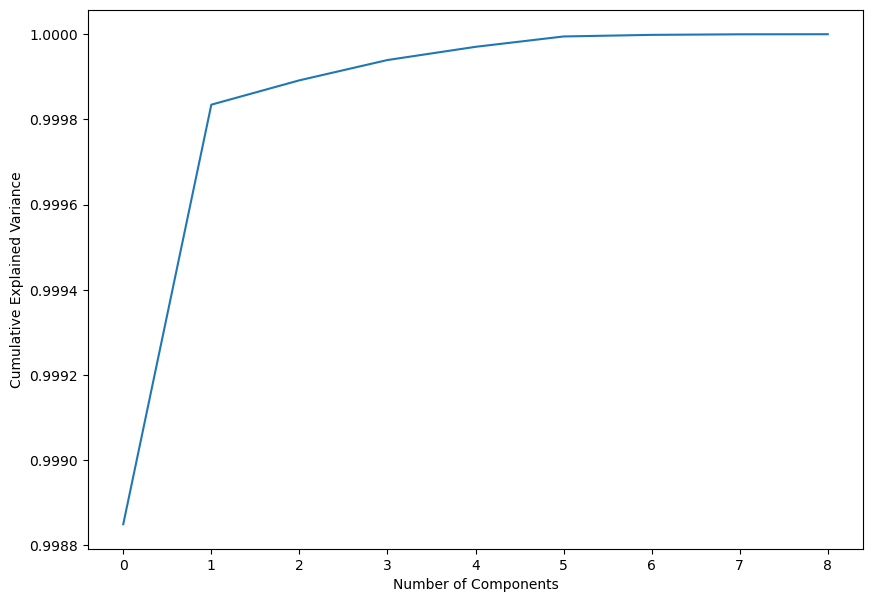

Training RMSE: 0.997793011926053
Test RMSE: 0.9877065262476554


In [13]:
#D7 performing pca on data 3
import numpy as np
from sklearn.decomposition import PCA

# PCA is determinstic so do not need to set random_state

pca = PCA()


#select numerical columns
numerical_data3 = train3.select_dtypes(include=['float64', 'int64'])

train3_pca = pca.fit_transform(numerical_data3)


plt.figure(figsize=(10,7))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.show()

pca = PCA(n_components=1)
train3_pca = pca.fit_transform(numerical_data3)
test3_pca = pca.transform(test3.select_dtypes(include=['float64', 'int64']))

lr = LinearRegression()
lr.fit(train3_pca, train3_target_scaled)

train3_pca_rmse = root_mean_squared_error(train3_target_scaled, lr.predict(train3_pca))
test3_pca_rmse = root_mean_squared_error(test3_target_scaled, lr.predict(test3_pca))
print(f"Training RMSE: {train3_pca_rmse}")
print(f"Test RMSE: {test3_pca_rmse}")



In [14]:
#D8

from sklearn.pipeline import Pipeline

num_components = [1,2,3,4,5,6,7,8]

pipe = Pipeline([('pca', PCA()), ('linear', LinearRegression())])

grid = GridSearchCV(pipe, param_grid={'pca__n_components': num_components}, cv=kf)

grid.fit(numerical_data3, train3_target_scaled)

best_num_components = grid.best_params_['pca__n_components']

print ("best number of components: ", best_num_components)


pca = PCA(n_components=best_num_components)
train3_pca = pca.fit_transform(numerical_data3)
test3_pca = pca.transform(test3.select_dtypes(include=['float64', 'int64']))

lr = LinearRegression()
lr.fit(train3_pca, train3_target_scaled)

train3_pca_rmse = root_mean_squared_error(train3_target_scaled, lr.predict(train3_pca))
test3_pca_rmse = root_mean_squared_error(test3_target_scaled, lr.predict(test3_pca))
print(f"Training RMSE: {train3_pca_rmse}")
print(f"Test RMSE: {test3_pca_rmse}")







best number of components:  8
Training RMSE: 0.005467106058199067
Test RMSE: 0.005327641116738831


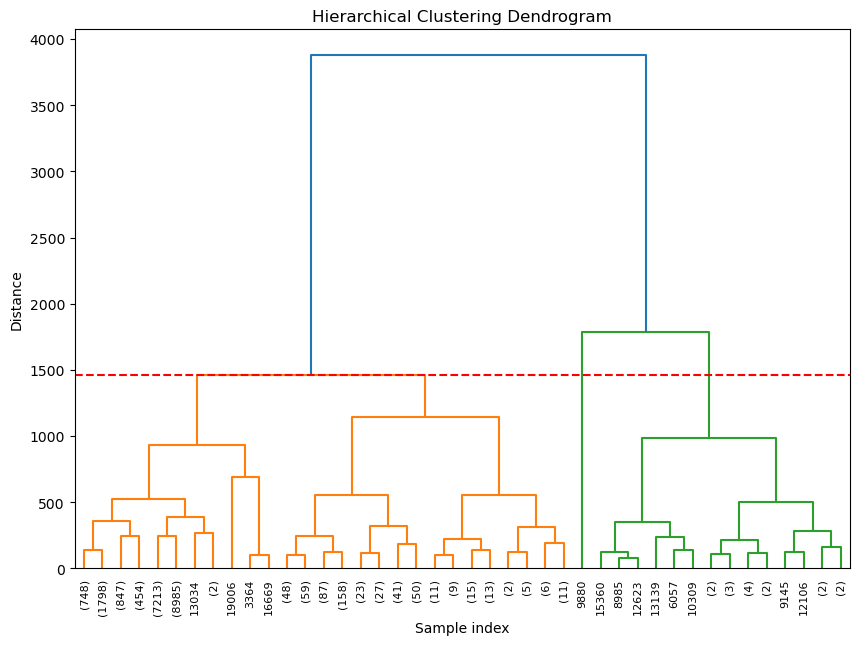

In [22]:
# D9 a)
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster

data3_noCategorical = data3.select_dtypes(include=['float64', 'int64'])

hierarchy = linkage(data3_noCategorical, method='average', metric='euclidean')

plt.figure(figsize=(10, 7))
dendrogram(hierarchy, truncate_mode='level', p=5)
plt.axhline(y=hierarchy[-(4 - 1), 2], color='r', linestyle='--')  # Cut the dendrogram to form 4 clusters
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Sample index')
plt.ylabel('Distance')
plt.show()

clusters = fcluster(hierarchy, 4, criterion='maxclust')
data3_noCategorical['Cluster'] = clusters



In [23]:
# D9 a)

cluster_means = data3_noCategorical.groupby('Cluster').mean()

cluster_sizes = data3_noCategorical['Cluster'].value_counts().sort_index()

print("Cluster Means:")
print(cluster_means)
print("\nCluster Sizes:")
print(cluster_sizes)

for cluster in range(1, 4 + 1):
    print(f"\nCluster {cluster} Characteristics:")
    print(cluster_means.loc[cluster])
    print(f"Size of Cluster {cluster}: {cluster_sizes[cluster]}")


Cluster Means:
          longitude   latitude  housingMedianAge   households  medianIncome  \
Cluster                                                                       
1       -119.582237  35.644002         29.019899   455.058102      3.865121   
2       -119.160814  35.238832         15.992920  1913.573451      4.032956   
3       -118.592174  34.658696          8.434783  4299.043478      4.790517   
4       -121.790000  36.640000         11.000000  6082.000000      2.308700   

         medianHouseValue  meanRooms  meanBedrooms  meanOccupation  
Cluster                                                             
1                2.064467   5.433992      1.097047        3.081625  
2                2.200015   5.239807      1.084566        2.686002  
3                2.444392   5.727040      1.071842        2.886163  
4                1.188000   5.364518      1.059684        4.696810  

Cluster Sizes:
Cluster
1    20051
2      565
3       23
4        1
Name: count, dtype: int64

C

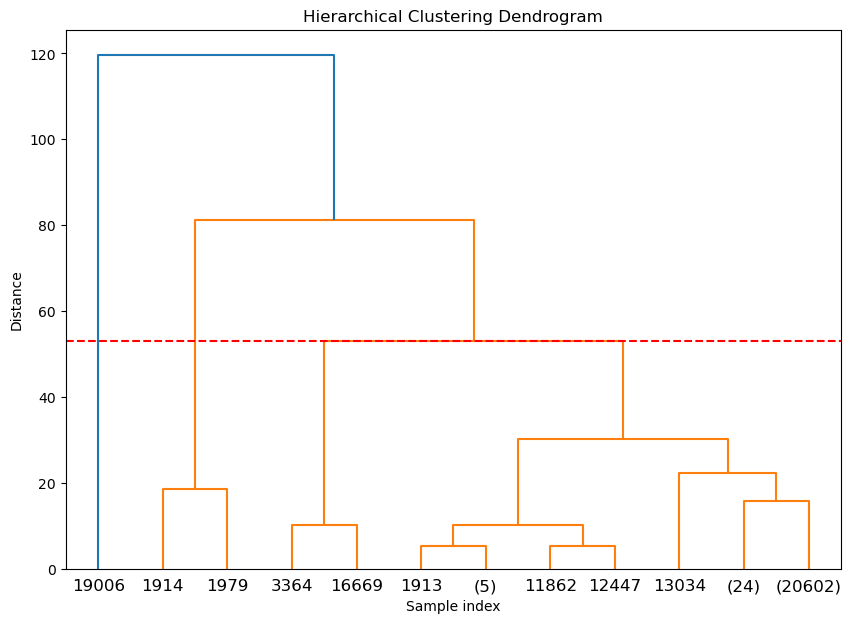

In [25]:
#D9 b) 

data3_noCategorical_scaled = scaler3.fit_transform(data3_noCategorical)


hierarchy = linkage(data3_noCategorical_scaled, method='average', metric='euclidean')

plt.figure(figsize=(10, 7))
dendrogram(hierarchy, truncate_mode='level', p=5)
plt.axhline(y=hierarchy[-(4 - 1), 2], color='r', linestyle='--') 
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Sample index')
plt.ylabel('Distance')
plt.show()

clusters = fcluster(hierarchy, 4, criterion='maxclust')

In [26]:
cluster_means = data3_noCategorical.groupby(clusters).mean()

cluster_sizes = pd.Series(clusters).value_counts().sort_index()

print("Cluster Means:")
print(cluster_means)
print("\nCluster Sizes:")
print(cluster_sizes)

for cluster in range(1, 4 + 1):
    print(f"\nCluster {cluster} Characteristics:")
    print(cluster_means.loc[cluster])
    print(f"Size of Cluster {cluster}: {cluster_sizes[cluster]}")

Cluster Means:
    longitude   latitude  housingMedianAge  households  medianIncome  \
1 -120.090000  38.855000         33.500000   13.000000      3.250000   
2 -120.605000  37.865000         41.000000   10.000000      4.890900   
3 -119.569437  35.631202         28.637024  499.658202      3.870324   
4 -121.980000  38.320000         45.000000    6.000000     10.226400   

   medianHouseValue   meanRooms  meanBedrooms  meanOccupation   Cluster  
1          3.312505  137.221212     29.851515        2.563636  1.000000  
2          2.087500    7.109890      1.225275      551.087912  1.000000  
3          2.068469    5.416173      1.093888        2.957484  1.029755  
4          1.375000    3.166667      0.833333     1243.333333  1.000000  

Cluster Sizes:
1        2
2        2
3    20635
4        1
Name: count, dtype: int64

Cluster 1 Characteristics:
longitude          -120.090000
latitude             38.855000
housingMedianAge     33.500000
households           13.000000
medianIncome    

In [30]:
#D9 c

from sklearn.cluster import KMeans

initial_centroids = cluster_means

kmeans = KMeans(n_clusters=4, init=cluster_means, n_init=1, random_state=5508)
kmeans_clusters = kmeans.fit_predict(data3_noCategorical_scaled)

data3_noCategorical['KMeans_Cluster'] = kmeans_clusters

kmeans_cluster_means = data3_noCategorical.groupby('KMeans_Cluster').mean()

for clu in range(4):
    print(f"\nCluster {clu + 1} Characteristics:")
    print(kmeans_cluster_means.loc[clu])
    print(f"Size of Cluster {clu + 1}: {data3_noCategorical['KMeans_Cluster'].value_counts()[clu]}")
    






Cluster 1 Characteristics:
longitude          -119.569487
latitude             35.631515
housingMedianAge     28.637496
households          499.611038
medianIncome          3.870264
medianHouseValue      2.068590
meanRooms             5.428946
meanBedrooms          1.096675
meanOccupation        2.957446
Cluster               1.029752
Name: 0, dtype: float64
Size of Cluster 1: 20637

Cluster 2 Characteristics:
longitude          -120.510000
latitude             40.410000
housingMedianAge     36.000000
households            7.000000
medianIncome          5.517900
medianHouseValue      0.675000
meanRooms             5.142857
meanBedrooms          1.142857
meanOccupation      599.714286
Cluster               1.000000
Name: 1, dtype: float64
Size of Cluster 2: 1

Cluster 3 Characteristics:
longitude           -121.980000
latitude              38.320000
housingMedianAge      45.000000
households             6.000000
medianIncome          10.226400
medianHouseValue       1.375000
meanRooms 

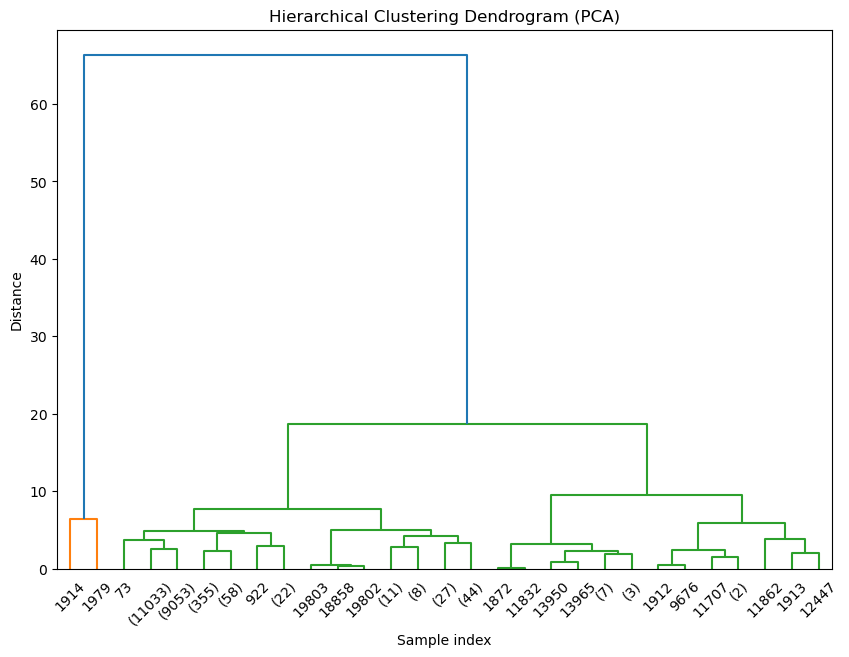

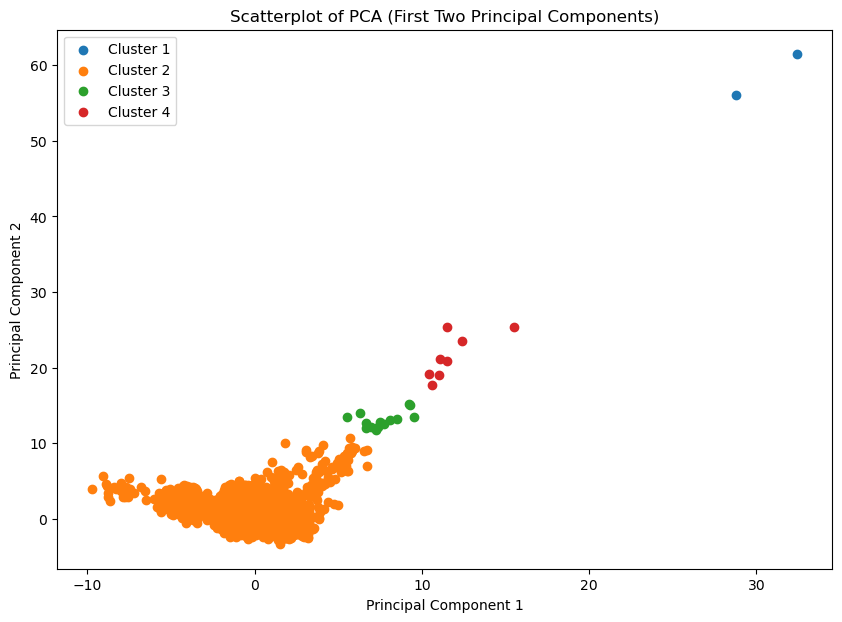

Cluster Sizes:
1        2
2    20616
3       14
4        8
Name: count, dtype: int64


In [32]:
#D9 d)

from sklearn.decomposition import PCA

pca = PCA(n_components=2)
principal_components = pca.fit_transform(data3_noCategorical_scaled)

hierarchy_pca = linkage(principal_components, method='average', metric='euclidean')

plt.figure(figsize=(10, 7))
dendrogram(hierarchy_pca, truncate_mode='level', p=5)
plt.title('Hierarchical Clustering Dendrogram (PCA)')
plt.xlabel('Sample index')
plt.ylabel('Distance')
plt.show()

clusters_pca = fcluster(hierarchy_pca, 4, criterion='maxclust')

plt.figure(figsize=(10, 7))
for cluster_num in np.unique(clusters_pca):
    plt.scatter(principal_components[clusters_pca == cluster_num, 0], 
                principal_components[clusters_pca == cluster_num, 1], 
                label=f'Cluster {cluster_num}')

plt.title('Scatterplot of PCA (First Two Principal Components)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.show()

# print size of each cluster 
cluster_sizes_pca = pd.Series(clusters_pca).value_counts().sort_index()
print("Cluster Sizes:")
print(cluster_sizes_pca)




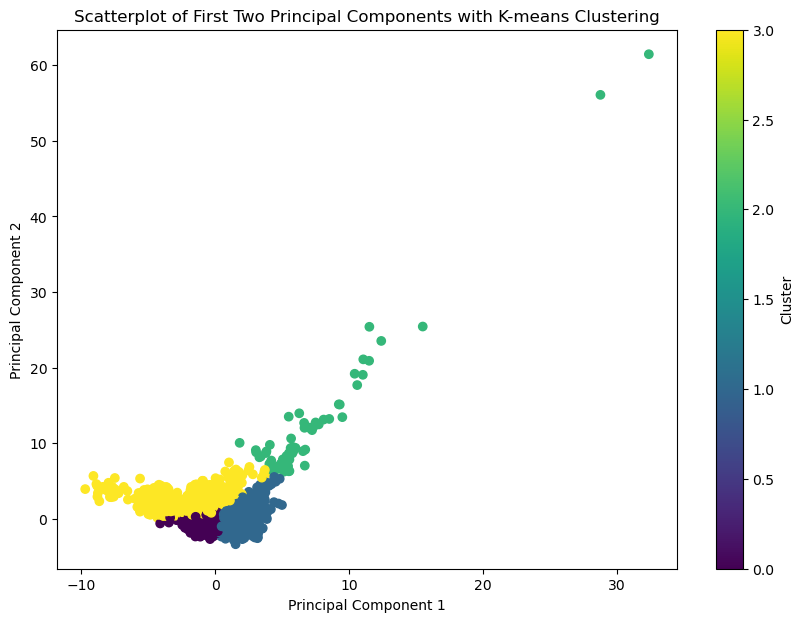

Cluster Sizes:
0    9015
1    8084
2      64
3    3477
Name: count, dtype: int64


In [34]:
#D9 e)

kmeans = KMeans(n_clusters=4, random_state=5508)
clusters = kmeans.fit_predict(principal_components)

plt.figure(figsize=(10, 7))
plt.scatter(principal_components[:, 0], principal_components[:, 1], c=clusters, cmap='viridis')
plt.title('Scatterplot of First Two Principal Components with K-means Clustering')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='Cluster')
plt.show()

# print size of each cluster
cluster_sizes_kmeans = pd.Series(clusters).value_counts().sort_index()
print("Cluster Sizes:")
print(cluster_sizes_kmeans)


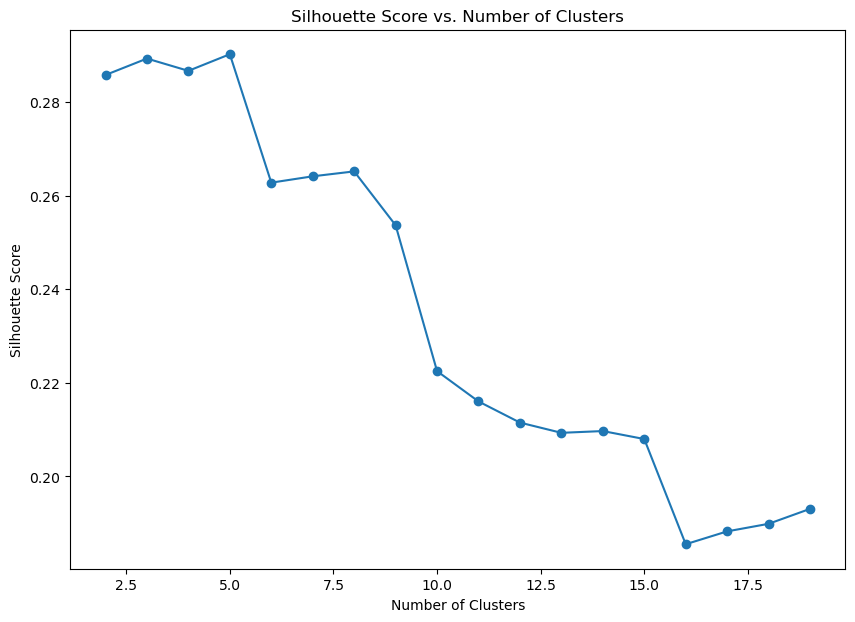

Best K:  5


In [39]:
#D10  a)
from sklearn.metrics import silhouette_score

data3_noCategorical = data3.select_dtypes(include=['float64', 'int64'])

data3_noCategorical_scaled = scaler3.fit_transform(data3_noCategorical)






k_values = range(2,20,1)

silhouette_scores = []

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=5508)
    clusters = kmeans.fit_predict(data3_noCategorical_scaled)
    silhouette_scores.append(silhouette_score(data3_noCategorical_scaled, clusters))

plt.figure(figsize=(10, 7))
plt.plot(k_values, silhouette_scores, marker='o')
plt.title('Silhouette Score vs. Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.show()

#find highest silhouette score
best_k = k_values[np.argmax(silhouette_scores)]
print("Best K: ", best_k)




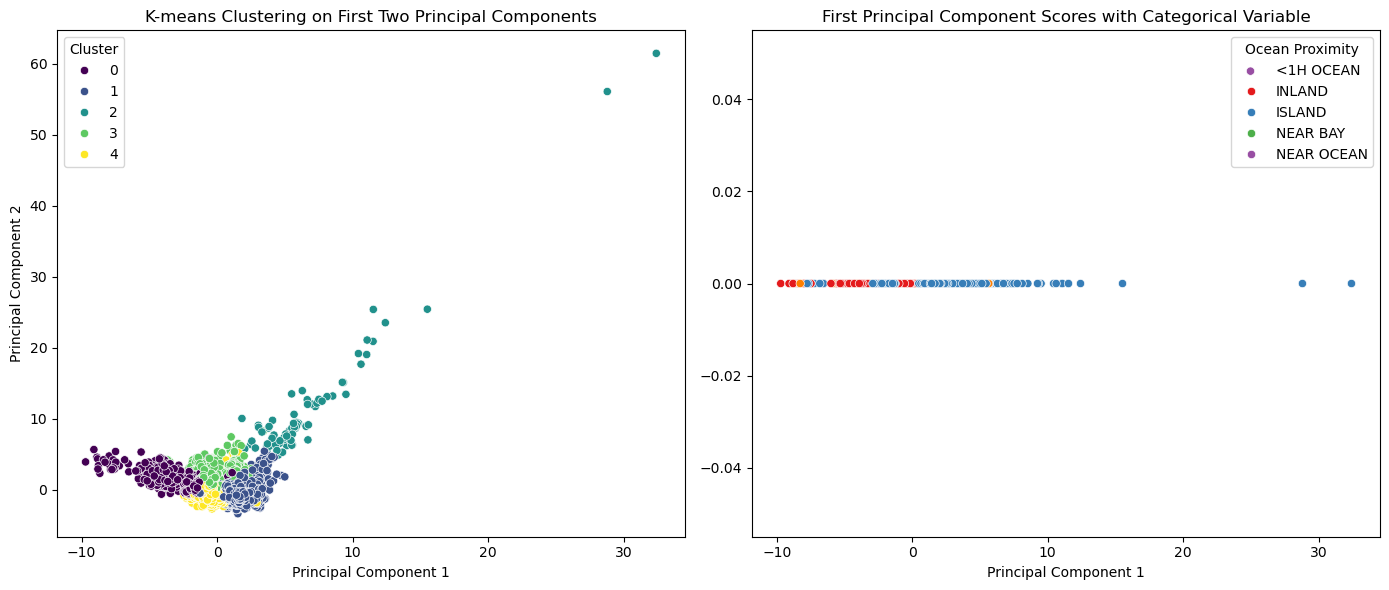

In [56]:
# D10 b) 


discarded_variables = data3.select_dtypes(include=['bool']).columns

kmeans = KMeans(n_clusters=best_k, random_state=5508)
clusters = kmeans.fit_predict(data3_noCategorical_scaled)

plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
sns.scatterplot(x=principal_components[:, 0], y=principal_components[:, 1], hue=clusters, palette='viridis')
plt.title('K-means Clustering on First Two Principal Components')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Cluster')

#used the original variable ocean proximitiy because ran into errors with dummy variables
housing_data['oceanProximity'] = pd.Categorical(housing_data['oceanProximity'])
ocean_proximity_colors = housing_data['oceanProximity'].cat.codes

plt.subplot(1, 2, 2)
sns.scatterplot(x=principal_components[:, 0], y=[0] * len(principal_components), hue=ocean_proximity_colors, palette='Set1')
plt.title('First Principal Component Scores with Categorical Variable')
plt.xlabel('Principal Component 1')
plt.ylabel('') 
plt.legend(title='Ocean Proximity', loc='upper right', labels=housing_data['oceanProximity'].cat.categories)

plt.tight_layout()
plt.show()


